In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/raw/transactions.csv')

# Parse timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (100516, 12)

First few rows:


,transaction_id,user_id,timestamp,amount,receiver,device_id,location,device_changed,location_changed,is_fraud,fraud_pattern,pattern
0,e752c2b9-d093-497e-a3cf-5ddc295924c9,user_000646,2025-07-28 06:00:42.388718,74.74,receiver_5827,device_844,South Gina,False,False,False,NaN,NaN
1,7a368b6d-63f2-48c0-a2e0-31d4c6ff595c,user_000164,2025-07-28 06:00:58.388718,1137.86,receiver_7081,device_667,Jamesborough,False,True,False,NaN,NaN
2,01ee8d62-909e-46a0-b6c6-f07f9ca742a5,user_000951,2025-07-28 06:11:46.388718,567.89,receiver_7545,device_118,New Dennisfurt,False,False,False,NaN,NaN
3,9f57411a-2ed4-497b-9cc6-0b2ed5703cb3,user_000826,2025-07-28 06:16:45.388718,3755.16,receiver_8345,device_121,Webbton,False,True,False,NaN,NaN
4,0a77201e-77e8-4c58-9fe4-d158989cda70,user_000406,2025-07-28 06:17:42.388718,217.67,receiver_9021,device_748,Christopherville,False,False,False,NaN,NaN


Fraud Distribution:
is_fraud
False    98000
True      2516
Name: count, dtype: int64

Fraud rate: 2.50%


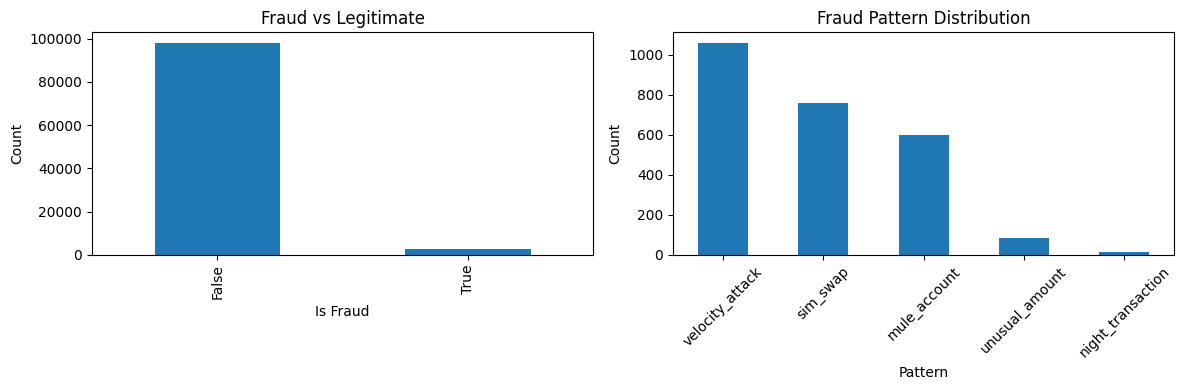

In [8]:
# Fraud distribution
print("Fraud Distribution:")
print(df['is_fraud'].value_counts())
print(f"\nFraud rate: {df['is_fraud'].mean():.2%}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Fraud vs Legitimate
df['is_fraud'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Fraud vs Legitimate')
axes[0].set_xlabel('Is Fraud')
axes[0].set_ylabel('Count')

# Fraud patterns
df[df['is_fraud']]['fraud_pattern'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Fraud Pattern Distribution')
axes[1].set_xlabel('Pattern')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

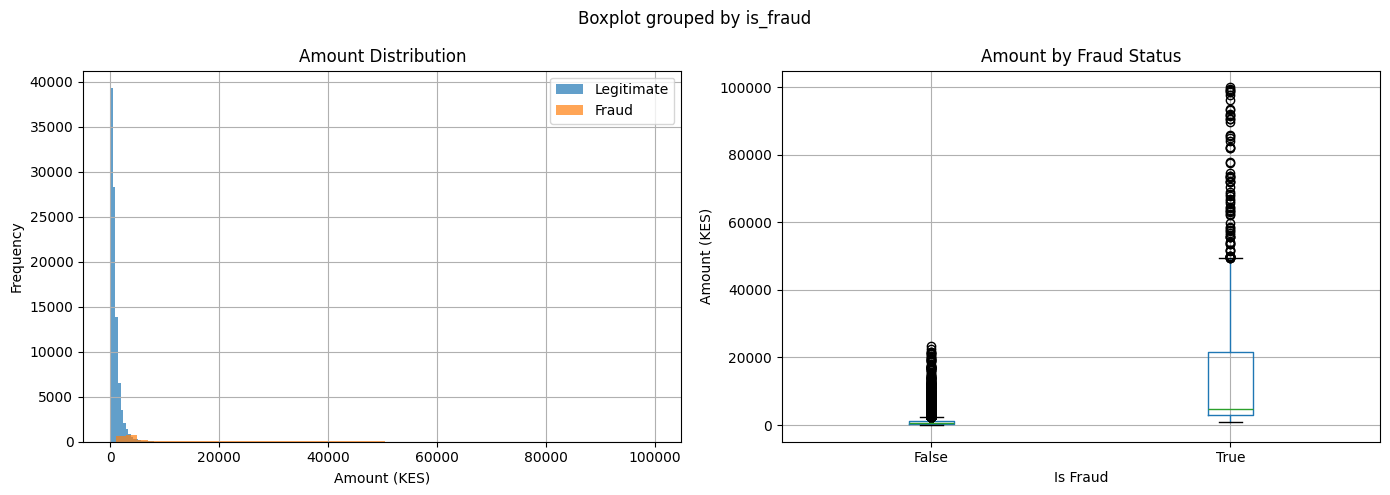

In [9]:
# Amount distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Amount distribution by fraud status
df[~df['is_fraud']]['amount'].hist(bins=50, ax=axes[0], alpha=0.7, label='Legitimate')
df[df['is_fraud']]['amount'].hist(bins=50, ax=axes[0], alpha=0.7, label='Fraud')
axes[0].set_title('Amount Distribution')
axes[0].set_xlabel('Amount (KES)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Box plot
df.boxplot(column='amount', by='is_fraud', ax=axes[1])
axes[1].set_title('Amount by Fraud Status')
axes[1].set_xlabel('Is Fraud')
axes[1].set_ylabel('Amount (KES)')

plt.tight_layout()
plt.show()

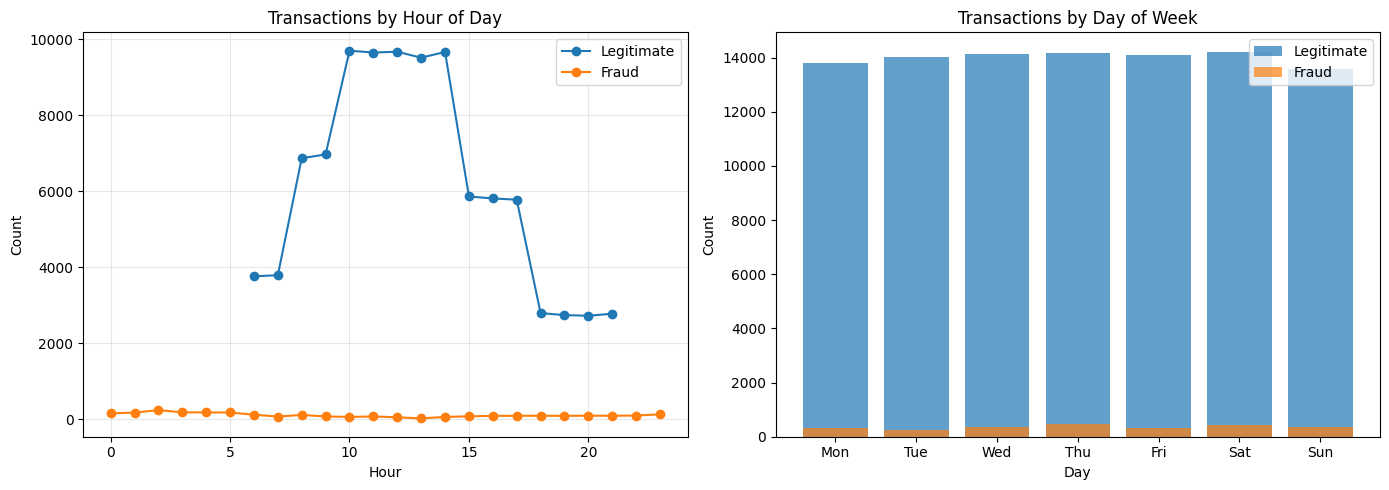

In [10]:
# Time patterns
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Transactions by hour
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

legitimate_hours = df[~df['is_fraud']]['hour'].value_counts().sort_index()
fraud_hours = df[df['is_fraud']]['hour'].value_counts().sort_index()

axes[0].plot(legitimate_hours.index, legitimate_hours.values, label='Legitimate', marker='o')
axes[0].plot(fraud_hours.index, fraud_hours.values, label='Fraud', marker='o')
axes[0].set_title('Transactions by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Day of week
legitimate_days = df[~df['is_fraud']]['day_of_week'].value_counts().sort_index()
fraud_days = df[df['is_fraud']]['day_of_week'].value_counts().sort_index()

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1].bar(days, legitimate_days.values, alpha=0.7, label='Legitimate')
axes[1].bar(days, fraud_days.values, alpha=0.7, label='Fraud')
axes[1].set_title('Transactions by Day of Week')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()

In [11]:
# Sample fraud transactions
print("Sample Fraud Transactions:")
print("="*80)
sample_fraud = df[df['is_fraud']].head(5)
for idx, row in sample_fraud.iterrows():
    print(f"\nPattern: {row['fraud_pattern']}")
    print(f"Amount: {row['amount']:.2f} KES")
    print(f"Time: {row['timestamp']}")
    print(f"Device changed: {row['device_changed']}")
    print(f"Location changed: {row['location_changed']}")
    print("-"*80)

Sample Fraud Transactions:

Pattern: unusual_amount
Amount: 91679.32 KES
Time: 2025-07-28 20:54:30.388718
Device changed: False
Location changed: True
--------------------------------------------------------------------------------

Pattern: sim_swap
Amount: 27957.89 KES
Time: 2025-07-29 01:25:48.388718
Device changed: True
Location changed: True
--------------------------------------------------------------------------------

Pattern: sim_swap
Amount: 15426.62 KES
Time: 2025-07-29 01:31:48.388718
Device changed: True
Location changed: True
--------------------------------------------------------------------------------

Pattern: sim_swap
Amount: 36310.64 KES
Time: 2025-07-29 01:33:48.388718
Device changed: True
Location changed: True
--------------------------------------------------------------------------------

Pattern: sim_swap
Amount: 29242.93 KES
Time: 2025-07-29 01:39:48.388718
Device changed: True
Location changed: True
---------------------------------------------------------

In [12]:
# 1. Fraud pattern breakdown
print("Fraud Pattern Distribution:")
print(df[df['is_fraud']]['fraud_pattern'].value_counts())
print(f"\nTotal fraud patterns: {df[df['is_fraud']]['fraud_pattern'].value_counts().sum()}")

# 2. Device/Location changes by fraud status
print("\n" + "="*80)
print("Device Changes:")
print(df.groupby('is_fraud')['device_changed'].value_counts(normalize=True))

print("\nLocation Changes:")
print(df.groupby('is_fraud')['location_changed'].value_counts(normalize=True))

# 3. Amount statistics
print("\n" + "="*80)
print("Amount Statistics by Fraud Status:")
print(df.groupby('is_fraud')['amount'].describe())

# 4. Velocity check (transactions per user)
print("\n" + "="*80)
print("Transactions per User:")
user_txn_counts = df.groupby(['user_id', 'is_fraud']).size().reset_index(name='count')
print("\nLegitimate users:")
print(user_txn_counts[~user_txn_counts['is_fraud']]['count'].describe())
print("\nFraud users:")
print(user_txn_counts[user_txn_counts['is_fraud']]['count'].describe())

Fraud Pattern Distribution:
fraud_pattern
velocity_attack      1059
sim_swap              758
mule_account          601
unusual_amount         84
night_transaction      14
Name: count, dtype: int64

Total fraud patterns: 2516

Device Changes:
is_fraud  device_changed
False     False             0.929490
          True              0.070510
True      False             0.682432
          True              0.317568
Name: proportion, dtype: float64

Location Changes:
is_fraud  location_changed
False     False               0.920245
          True                0.079755
True      False               0.684817
          True                0.315183
Name: proportion, dtype: float64

Amount Statistics by Fraud Status:
            count          mean           std          min          25%  \
is_fraud                                                                  
False     98000.0    930.856714   1004.590258    50.000000   359.280000   
True       2516.0  13546.727092  16789.794576  1009.448